In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np

model = InceptionV3(weights='imagenet')

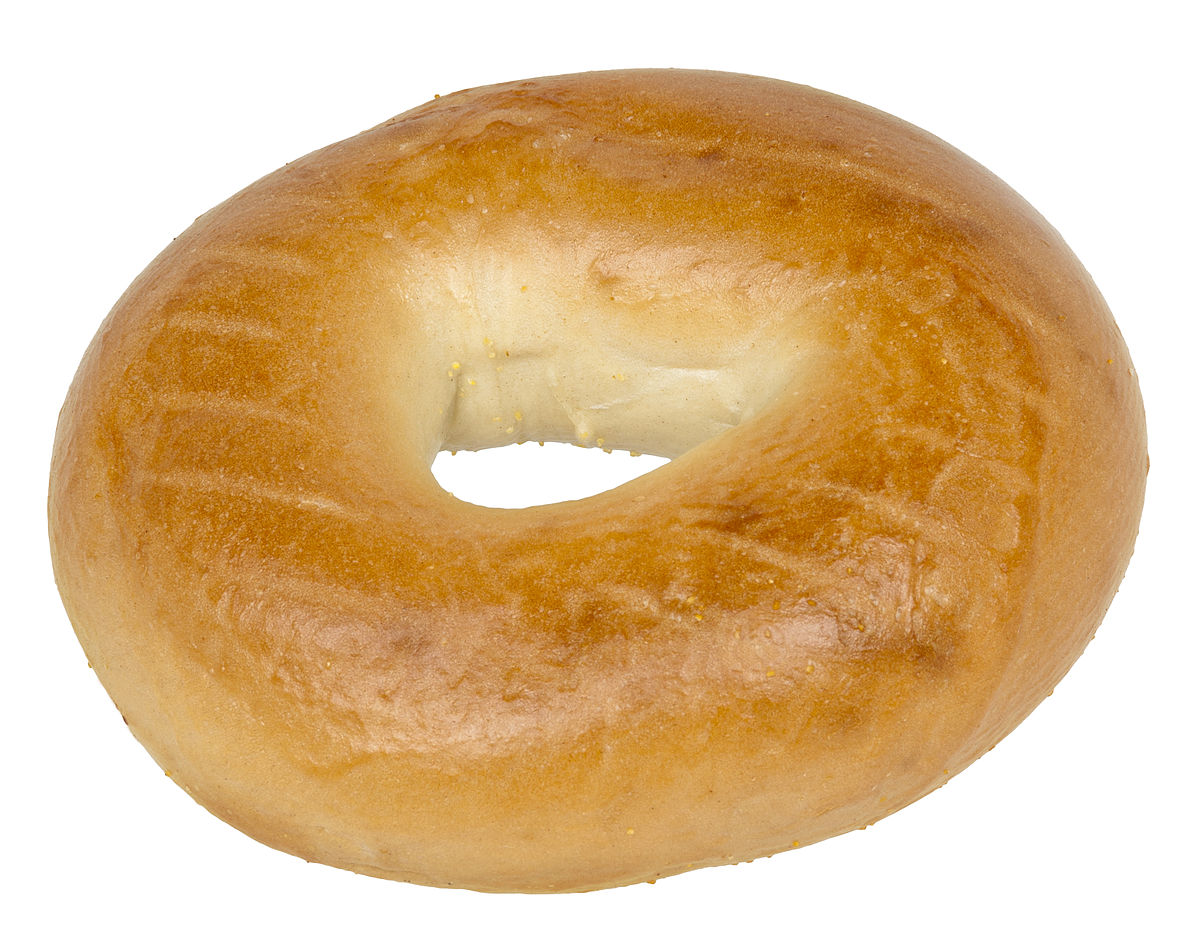

In [21]:
img_path = 'data/bagel.jpg'
from IPython.display import Image 
Image(img_path)

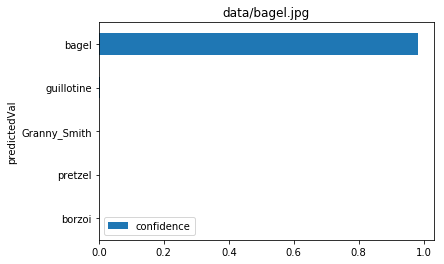

In [80]:
import pandas as pd

def transferLearn(img_path):    
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    # model.summary()
    preds = model.predict(x)
    # print('Predicted:', decode_predictions(preds, top=3)[0])
    # model.save('image.h5')

    df = pd.DataFrame(decode_predictions(preds, top=5)[0],columns=['code','predictedVal','confidence'])
    _ = df.sort_values(by='confidence').plot.barh(x='predictedVal',y='confidence',title=img_path)
    
transferLearn('data/bagel.jpg')

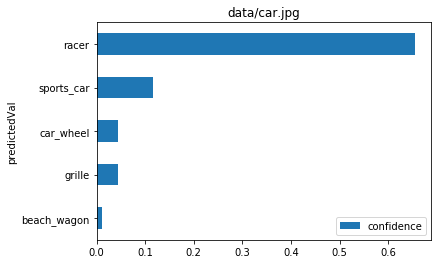

In [79]:
transferLearn('data/car.jpg')

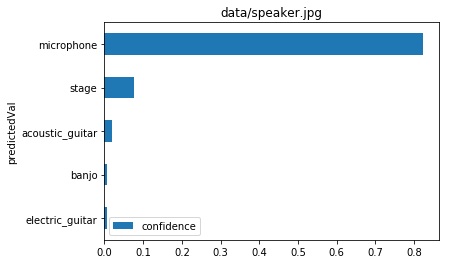

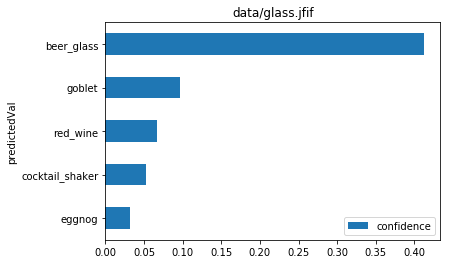

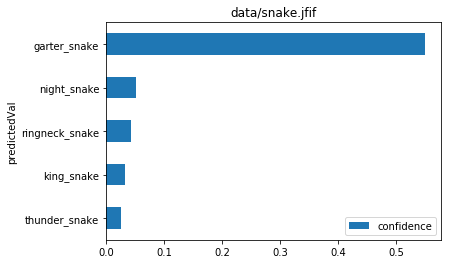

In [82]:
transferLearn('data/speaker.jpg')
transferLearn('data/glass.jfif')
transferLearn('data/snake.jfif')

In [ ]:
#not used
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np
from keras import backend as K
import os

from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions


# pip install opencv-python
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np
from keras import backend as K
import os

# get weights from https://drive.google.com/file/d/0Bz7KyqmuGsilT0J5dmRCM0ROVHc
K.set_image_dim_ordering('th')

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

if __name__ == "__main__":
    model = VGG_16()
    model.summary()
    # Test pretrained model if weights exist
    if os.path.exists("vgg16_weights.h5"):
        im = cv2.resize(cv2.imread('elephant.jpg'), (224, 224)).astype(np.float32)
        im[:,:,0] -= 103.939
        im[:,:,1] -= 116.779
        im[:,:,2] -= 123.68
        im = im.transpose((2,0,1))
        im = np.expand_dims(im, axis=0)
        model = VGG_16('vgg16_weights.h5')
        sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(optimizer=sgd, loss='categorical_crossentropy')
        out = model.predict(im)
        print(np.argmax(out))

		
		
	    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])
